# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [117]:
%matplotlib notebook

In [230]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import Openweather
import openweathermapy.core as owm

# progress bar
from tqdm import tqdm_notebook

# Output File (CSV)
output_data_file = "output_data/cities.csv"
fig_file1 = "plot/lat_temp.png"
fig_file2 = "plot/lat_humidity.png"
fig_file3 = "plot/lat_cloud.png"
fig_file4 = "plot/lat_wind.png"

# output for image
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [22]:
#check cities
cities[0:15]

['netarhat',
 'thompson',
 'sitka',
 'west wendover',
 'coquimbo',
 'luwuk',
 'krasnoarmeysk',
 'bluff',
 'peniche',
 'belushya guba',
 'port alfred',
 'lichuan',
 'labuhan',
 'banes',
 'longyearbyen']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# create data array
city_weather = []
store_index  = []
store_cityName = []
store_city_not_found = []
count_city_not_found = 0  # count number of cities not found

# transform cities into datframe for the progress bar
cities_df = pd.DataFrame(cities,columns=['city'])

cities_df.head()


,city
0,netarhat
1,thompson
2,sitka
3,west wendover
4,coquimbo


In [31]:
city_weather = []
store_index  = []
store_cityName = []
store_city_not_found = []
count_city_not_found = 0  # count number of cities not found

# Parameters to split df into sets to avoid pulling too much data from API and get the API key blocked
ncity = len(cities) # total number of cities
step  = 50          # number city for set
nloop = int (ncity/step) +1  # total number of sets

count_city_not_found = 0  # count cities not found
count_city_found = 0      # count cities found
iset = 0                  # set set index to 0



for index, row in tqdm_notebook(list(cities_df.iterrows())): # add progress bar for fun
    if (0 == index):  # Display for the first data only
        print("Beginning Data Retrieval ")
        print("-----------------------------")
        
    if (index > step & 0 == (index%step) ):  # Increase istep at the end of iset 
        iset = iset +1
        time.sleep(15)   # Pause to avoid pulling too much data
    try:      # access to API and get data 
        city_weather.append(owm.get_current(cities_df.loc[index, 'city'], **settings))
               
        if (0 == (index%step)):  # Text for the first data of each set
            print(f"Processing Record {0} of set {iset+1} | {cities_df.loc[index, 'city']}")
        else:   # Text for the other data of each set
            print(f"Processing Record {index-(iset*step)} of set {iset+1} | {cities_df.loc[index, 'city']}") 
        count_city_found = count_city_found+1
                  
    except:  # catch error to avoid code crash    
        store_city_not_found.append(cities_df.loc[index, 'city'])
        count_city_not_found = count_city_not_found +1
        print(f"{cities_df.loc[index, 'city']} not found")

              
# Print ending message
print("-----------------------------")      
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------


Processing Record 0 of set 1 | netarhat
Processing Record 1 of set 1 | thompson
Processing Record 2 of set 1 | sitka
Processing Record 3 of set 1 | west wendover
Processing Record 4 of set 1 | coquimbo
Processing Record 5 of set 1 | luwuk
Processing Record 6 of set 1 | krasnoarmeysk
Processing Record 7 of set 1 | bluff
Processing Record 8 of set 1 | peniche
belushya guba not found
Processing Record 10 of set 1 | port alfred
Processing Record 11 of set 1 | lichuan
Processing Record 12 of set 1 | labuhan
Processing Record 13 of set 1 | banes
Processing Record 14 of set 1 | longyearbyen
Processing Record 15 of set 1 | aleksandrovsk-sakhalinskiy
Processing Record 16 of set 1 | new norfolk
barentsburg not found
Processing Record 18 of set 1 | carnarvon
Processing Record 19 of set 1 | comodoro rivadavia
Processing Record 20 of set 1 | mataura
Processing Record 21 of set 1 | east london
Processing Record 22 of set 1 | bhaderwah
Processing Record 23 of set 1 | parana
palabuhanratu not found
Pr

Processing Record 9 of set 5 | san patricio
grand river south east not found
Processing Record 11 of set 5 | castro
Processing Record 12 of set 5 | constitucion
Processing Record 13 of set 5 | luanda
Processing Record 14 of set 5 | faanui
Processing Record 15 of set 5 | luderitz
Processing Record 16 of set 5 | wattegama
Processing Record 17 of set 5 | turukhansk
Processing Record 18 of set 5 | siay
Processing Record 19 of set 5 | abu samrah
Processing Record 20 of set 5 | yellowknife
tingrela not found
Processing Record 22 of set 5 | berdigestyakh
Processing Record 23 of set 5 | tiznit
Processing Record 24 of set 5 | aden
Processing Record 25 of set 5 | laguna
Processing Record 26 of set 5 | tuatapere
saleaula not found
Processing Record 28 of set 5 | kudahuvadhoo
Processing Record 29 of set 5 | aragarcas
kamenskoye not found
Processing Record 31 of set 5 | vazhiny
Processing Record 32 of set 5 | half moon bay
Processing Record 33 of set 5 | atuona
puerto pinasco not found
Processing R

crab hill not found
Processing Record 25 of set 9 | katete
Processing Record 26 of set 9 | chernyshevskiy
Processing Record 27 of set 9 | prince rupert
Processing Record 28 of set 9 | tarabuco
Processing Record 29 of set 9 | manzanillo
Processing Record 30 of set 9 | kindu
Processing Record 31 of set 9 | maragogi
Processing Record 32 of set 9 | port macquarie
Processing Record 33 of set 9 | narasannapeta
taburi not found
Processing Record 35 of set 9 | waipawa
Processing Record 36 of set 9 | witu
Processing Record 37 of set 9 | kendari
Processing Record 38 of set 9 | joensuu
Processing Record 39 of set 9 | jacareacanga
Processing Record 40 of set 9 | astoria
Processing Record 41 of set 9 | paamiut
nizhneyansk not found
panjwin not found
Processing Record 44 of set 9 | srednekolymsk
Processing Record 45 of set 9 | kiruna
Processing Record 46 of set 9 | bereda
Processing Record 47 of set 9 | marovoay
Processing Record 48 of set 9 | mananjary
Processing Record 49 of set 9 | fukue
kashi no

Processing Record 33 of set 13 | sao desiderio
Processing Record 34 of set 13 | yeppoon
Processing Record 35 of set 13 | weihe

-----------------------------
Data Retrieval Complete
-----------------------------


In [32]:
# check number of cities found
count_city_found

560

In [33]:
# check number of cities not found
count_city_not_found

76

In [41]:
# check number of length of dataframe
cities_df.count()

city    636
dtype: int64

In [39]:
# check if all cities were processed (count_city_found + count_city_not_found = length(cities))
count_city_found + count_city_not_found

636

In [34]:
# check first data inside city_weather
city_weather[0]

{'coord': {'lon': 84.31, 'lat': 23.45},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 24.1,
  'pressure': 1002.32,
  'humidity': 85,
  'temp_min': 24.1,
  'temp_max': 24.1,
  'sea_level': 1002.32,
  'grnd_level': 915.64},
 'wind': {'speed': 2.56, 'deg': 187.203},
 'clouds': {'all': 37},
 'dt': 1563740636,
 'sys': {'message': 0.0064,
  'country': 'IN',
  'sunrise': 1563752880,
  'sunset': 1563801000},
 'timezone': 19800,
 'id': 1261497,
 'name': 'Netarhat',
 'cod': 200}

In [36]:
# check last data inside city_weather
city_weather[-1]

{'coord': {'lon': 105.33, 'lat': 32.99},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 18.1,
  'pressure': 1006.5,
  'humidity': 97,
  'temp_min': 18.1,
  'temp_max': 18.1,
  'sea_level': 1006.5,
  'grnd_level': 832.47},
 'wind': {'speed': 3.5, 'deg': 8.369},
 'rain': {'3h': 20.312},
 'clouds': {'all': 100},
 'dt': 1563740879,
 'sys': {'message': 0.0058,
  'country': 'CN',
  'sunrise': 1563746682,
  'sunset': 1563797108},
 'timezone': 28800,
 'id': 7372400,
 'name': 'Weihe',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
city_weather[0]

{'coord': {'lon': 84.31, 'lat': 23.45},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 24.1,
  'pressure': 1002.32,
  'humidity': 85,
  'temp_min': 24.1,
  'temp_max': 24.1,
  'sea_level': 1002.32,
  'grnd_level': 915.64},
 'wind': {'speed': 2.56, 'deg': 187.203},
 'clouds': {'all': 37},
 'dt': 1563740636,
 'sys': {'message': 0.0064,
  'country': 'IN',
  'sunrise': 1563752880,
  'sunset': 1563801000},
 'timezone': 19800,
 'id': 1261497,
 'name': 'Netarhat',
 'cod': 200}

In [109]:
# extract Temperature, humidity, lat,lon, country, wind speed, date, city,max. temperature
temperature = []
humidity    = []
lat         = []
long        = []
cloudiness  = []
wind_speed  = []
country     = []
dt          = []
city_name   = []

for i in range (count_city_found):
    lat.append(city_weather[i]["coord"]["lat"])
    long.append(city_weather[i]["coord"]["lon"])
    temperature.append(city_weather[i]["main"]["temp_max"])
    humidity.append(city_weather[i]["main"]["humidity"])
    cloudiness.append(city_weather[i]["clouds"]["all"])
    country.append(city_weather[i]["sys"]["country"])
    wind_speed.append(city_weather[i]["wind"]["speed"])
    dt.append(city_weather[i]["dt"])
    city_name.append(city_weather[i]["name"])
print("done")

done


In [108]:
# Create dataframe from extracted data
weather_data_df = pd.DataFrame({
                     'City' : city_name , 
                     'Cloudiness':cloudiness,
                     'Country':country ,
                     'Date':dt, 
                     'Humidity':humidity, 
                     "Lat":lat, 
                     "Lon":long, 
                     "Max temp": temperature, 
                     "Wind speed":wind_speed 
                    })

weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max temp,Wind speed
0,Netarhat,37,IN,1563740636,85,23.45,84.31,24.10,2.56
1,Thompson,20,CA,1563740637,36,55.74,-97.86,24.00,5.70
2,Sitka,80,US,1563740637,46,37.17,-99.65,33.33,0.45
3,West Wendover,1,US,1563740637,18,40.74,-114.07,32.00,4.60
4,Coquimbo,90,CL,1563740637,87,-29.95,-71.34,12.00,2.60


In [111]:
# Save in CVS file 
#  without the Pandas index, but with the header
weather_data_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [165]:
# check date (dt in Unix time)
dt_format = []
for i in range (count_city_found):
    dt_format.append(datetime.utcfromtimestamp(dt[i]).strftime('%Y-%m-%d %H:%M:%S'))

In [166]:
# found the date 

dt_format = pd.Series(dt_format) # transform the dt list into serie to use split()

date = []

# extract date in Year-month-day format
for i in range (count_city_found): 
    date.append(dt_format.str.split(" ")[i][0])

In [171]:
# checl if date is unique
date= pd.Series(date)
day = date.unique()[0]
day

'2019-07-21'

In [235]:
# extract lat and temp to prepare the plot
x = weather_data_df["Lat"]
y = weather_data_df["Max temp"]

In [236]:
min_temp = weather_data_df["Max temp"].min()
max_temp = weather_data_df["Max temp"].max()

In [237]:
# determine the minmax of the temperature axis
margin_temp = 5  # margin value
axis_temp_max = round(max_temp/10)*10 + margin_temp
axis_temp_min = round(min_temp/10)*10 - margin_temp

<IPython.core.display.Javascript object>


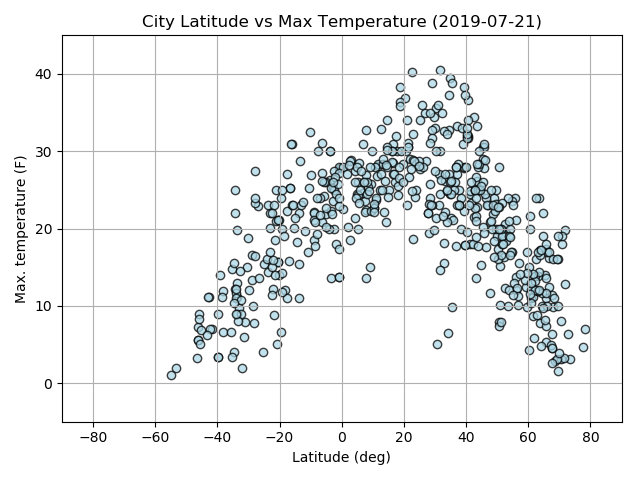

In [238]:
fig1=plt.figure(1)
plt.scatter(x,y, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.xlim(-90,90)  # range of lat [-90:90]
plt.ylim(axis_temp_min,axis_temp_max)

plt.xlabel("Latitude (deg)")
plt.ylabel("Max. temperature (F)")
plt.grid()

plt.title(f"City Latitude vs Max Temperature ({day})")
plt.tight_layout()
plt.show()

In [239]:
plt.savefig(fig_file1)

In [240]:
plt.close(fig1)

#### Latitude vs. Humidity Plot

In [225]:
# assign humidity to y
y = weather_data_df["Humidity"]

In [226]:
min_humidity = weather_data_df["Humidity"].min()
max_humidity = weather_data_df["Humidity"].max()

In [227]:
# determine the minmax of the humidity axis
margin_temp = 5  # margin value
axis_humidity_max = round(max_humidity/10)*10 + margin_temp
axis_humidity_min = 0 # can't be negative

<IPython.core.display.Javascript object>


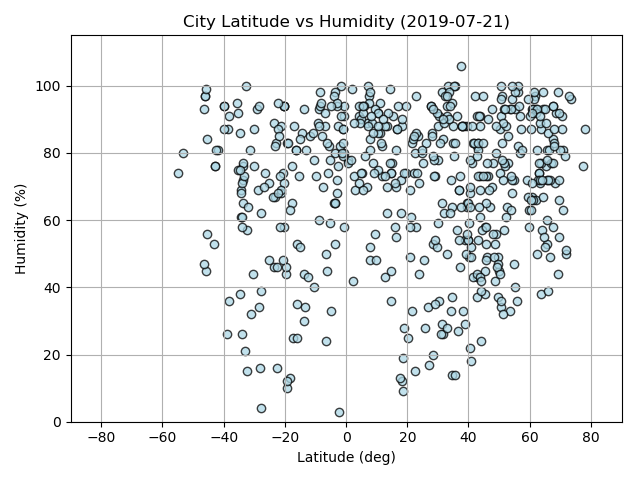

In [231]:
fig2=plt.figure(2)

plt.scatter(x,y, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.xlim(-90,90)  # range of lat [-90:90]
plt.ylim(axis_humidity_min,axis_humidity_max)

plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.grid()

plt.title(f"City Latitude vs Humidity ({day})")
plt.tight_layout()
plt.show()

In [232]:
plt.savefig(fig_file2)
plt.close(fig2)

#### Latitude vs. Cloudiness Plot

In [241]:
# assign cloudiness to y
y = weather_data_df["Cloudiness"]

In [243]:
min_cloud = weather_data_df["Cloudiness"].min()
max_cloud = weather_data_df["Cloudiness"].max()

In [244]:
# determine the minmax of the cloudiness axis
margin_temp = 5  # margin value
axis_cloud_max = round(max_cloud/10)*10 + margin_temp
axis_cloud_min = 0 # can't be negative

<IPython.core.display.Javascript object>


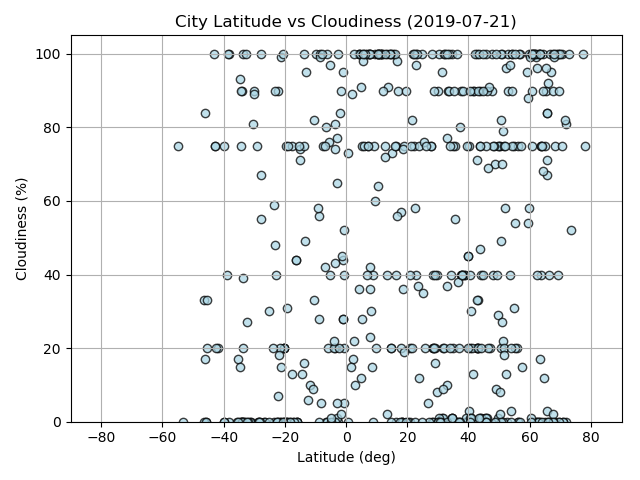

In [245]:
fig3=plt.figure(3)

plt.scatter(x,y, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.xlim(-90,90)  # range of lat [-90:90]
plt.ylim(axis_cloud_min,axis_cloud_max)

plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.title(f"City Latitude vs Cloudiness ({day})")
plt.tight_layout()
plt.show()

In [246]:
plt.savefig(fig_file3)
plt.close(fig3)

#### Latitude vs. Wind Speed Plot

In [247]:
# assign cloudiness to y
y = weather_data_df["Wind speed"]

In [248]:
min_wind = weather_data_df["Wind speed"].min()
max_wind = weather_data_df["Wind speed"].max()

In [252]:
# determine the minmax of the cloudiness axis
margin_temp = 5  # margin value
axis_wind_max = round(max_wind/10)*10 + margin_temp
axis_wind_min = 0 # can't be negative

<IPython.core.display.Javascript object>


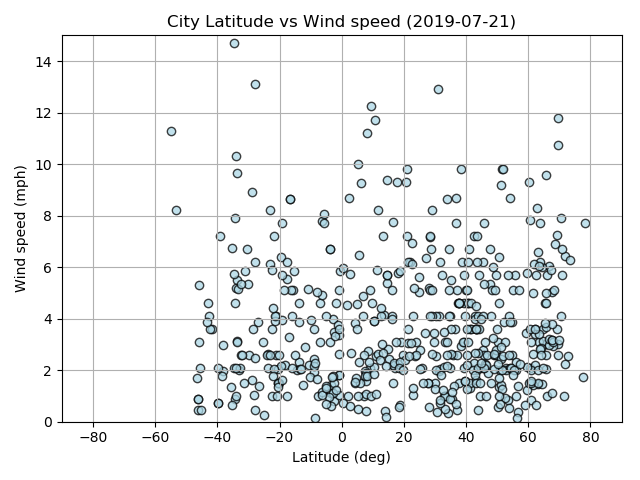

In [253]:
fig4=plt.figure(4)

plt.scatter(x,y, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.xlim(-90,90)  # range of lat [-90:90]
plt.ylim(axis_wind_min,axis_wind_max)

plt.xlabel("Latitude (deg)")
plt.ylabel("Wind speed (mph)")
plt.grid()

plt.title(f"City Latitude vs Wind speed ({day})")
plt.tight_layout()
plt.show()

In [254]:
plt.savefig(fig_file4)
plt.close(fig4)